## Prediction of Category of the Customer

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Acquisition](#Data_Acquisition)
* [Data Wrangling](#Data_Wrangling)
* [Data Exploration](#Data_Exploration)
* [Model Development](#Model_Development)

## Introduction

In this challenge, I have to cluster the customers into two different groups so that I can recommend the correct products based on the customer’s cluster. I have used classification machine learning algorithm because train dataset is labelled and dependent variable 'customer_category' is categorical(0, 1).

## Data Acquisition

In [567]:
# scintific computing libraries
import numpy as np
import pandas as pd

In [568]:
df_train = pd.read_csv('train.csv')
df_train.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [569]:
df_test = pd.read_csv('test.csv')
df_test.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [570]:
data = [df_train, df_test]

## Data Wrangling

In [571]:
df_train.shape

(10738, 12)

In [572]:
df_train.dtypes

customer_id                          object
customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_stay_score                 float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_active_segment              object
X1                                   object
customer_category                     int64
dtype: object

In [573]:
df_train.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
count,10738.000000,10696.000000,10738.000000,10701.000000,10738.000000,10692.000000,10672.000000,10738.000000,10738.000000
mean,19.060941,5.274847,0.175912,0.374230,2.376895,5.788180,3.150071,17.061836,0.120600
std,7.419609,1.882559,0.372829,1.222031,5.601911,2.531309,1.035416,18.762693,0.325677
min,0.568965,-0.161940,-0.547989,-0.462494,0.028575,2.752836,0.363338,-0.486834,0.000000
25%,13.518021,3.971587,0.010840,-0.027666,0.313610,4.193234,2.454017,4.530085,0.000000
50%,18.774109,5.218479,0.074078,0.037201,0.516830,4.842575,3.118394,12.653357,0.000000
75%,24.501719,6.520364,0.159606,0.179029,1.125380,6.286400,3.756566,23.114577,0.000000
max,47.306691,16.638243,2.679474,14.701914,52.395014,18.743836,9.090206,248.552755,1.000000


In [574]:
df_train['customer_category'].value_counts()

0    9443
1    1295
Name: customer_category, dtype: int64

In [575]:
df_test.isnull().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64

In [576]:
df_train['customer_active_segment'].value_counts()

C     4919
B     4430
D      536
AA     418
A      412
Name: customer_active_segment, dtype: int64

In [577]:
df_train['X1'].value_counts()

BA    4511
A     2268
F     2235
AA    1611
E       76
Name: X1, dtype: int64

In [578]:
for df in data:
    df['customer_product_search_score'].replace(np.nan, df['customer_product_search_score'].median(), inplace = True)
    df['customer_stay_score'].replace(np.nan, df['customer_stay_score'].median(), inplace = True)
    df['customer_product_variation_score'].replace(np.nan, df['customer_product_variation_score'].median(), inplace = True)
    df['customer_order_score'].replace(np.nan, df['customer_order_score'].median(), inplace = True)
    df['customer_active_segment'].replace(np.nan, 'D', inplace = True)
    df['X1'].replace(np.nan, 'E', inplace = True)

In [579]:
new_cols = pd.get_dummies(df_train[['customer_active_segment','X1']])
df_train = pd.concat([df_train, new_cols], axis=1)

new_cols = pd.get_dummies(df_test[['customer_active_segment','X1']])
df_test = pd.concat([df_test, new_cols], axis=1)

In [580]:
df_train.drop(['customer_id','customer_active_segment','X1'], axis=1, inplace=True)

customer_id = df_test['customer_id'].values
df_test.drop(['customer_id','customer_active_segment','X1'], axis=1, inplace=True)

In [581]:
df_train.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,X1_A,X1_AA,X1_BA,X1_E,X1_F
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,0,0,0,0,1,0,0,0,0,0,1
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,0,0,0,0,1,0,1,0,0,0,0
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,0,0,0,0,1,0,0,0,1,0,0
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,0,0,1,0,0,0,0,0,0,0,1
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,0,0,0,0,1,0,0,1,0,0,0


## Data Exploration

In [582]:
# visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [583]:
df_train.corr()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,X1_A,X1_AA,X1_BA,X1_E,X1_F
customer_visit_score,1.000000,0.273879,-0.569430,-0.473134,-0.209270,-0.219462,0.169942,0.118925,-0.449654,0.365449,0.376517,0.022565,-0.140295,-0.379174,0.071259,0.054843,-0.022832,0.009054,-0.094402
customer_product_search_score,0.273879,1.000000,-0.415732,-0.414079,-0.022984,-0.065755,0.050875,0.044064,-0.300462,0.070595,0.061932,0.060665,-0.019076,-0.206620,0.031322,0.009205,-0.002214,0.007518,-0.038786
customer_ctr_score,-0.569430,-0.415732,1.000000,0.907221,0.419461,0.447256,-0.341667,-0.232876,0.794445,-0.107086,-0.111523,-0.171236,0.025424,0.512152,-0.139392,-0.111697,0.044020,-0.020547,0.190040
customer_stay_score,-0.473134,-0.414079,0.907221,1.000000,0.400025,0.405500,-0.310317,-0.210383,0.677941,-0.061417,-0.060833,-0.169394,0.000478,0.480396,-0.124820,-0.099976,0.045012,-0.017238,0.163042
customer_frequency_score,-0.209270,-0.022984,0.419461,0.400025,1.000000,0.702169,-0.532368,-0.326201,0.389465,-0.001179,0.016544,-0.115730,0.005185,0.231456,-0.179431,-0.160269,0.070044,-0.027724,0.243184
customer_product_variation_score,-0.219462,-0.065755,0.447256,0.405500,0.702169,1.000000,-0.690987,-0.524955,0.492628,-0.002668,0.009198,-0.107860,-0.003183,0.240465,-0.254946,-0.297309,0.116278,-0.061802,0.392004
customer_order_score,0.169942,0.050875,-0.341667,-0.310317,-0.532368,-0.690987,1.000000,0.762466,-0.384326,-0.002424,-0.006853,0.100445,-0.011356,-0.189064,0.150858,0.499145,-0.207019,0.200900,-0.389531
customer_affinity_score,0.118925,0.044064,-0.232876,-0.210383,-0.326201,-0.524955,0.762466,1.000000,-0.274105,-0.002643,0.012657,0.070391,-0.016404,-0.127936,0.031430,0.646309,-0.279620,0.414411,-0.364305
customer_category,-0.449654,-0.300462,0.794445,0.677941,0.389465,0.492628,-0.384326,-0.274105,1.000000,-0.070994,-0.071573,-0.145369,0.017660,0.406248,-0.169209,-0.137966,0.066034,-0.021376,0.216569
customer_active_segment_A,0.365449,0.070595,-0.107086,-0.061417,-0.001179,-0.002668,-0.002424,-0.002643,-0.070994,1.000000,-0.040200,-0.167393,-0.183652,-0.046810,0.003540,0.002971,-0.007937,-0.011097,0.006266


In [584]:
df_train.corr()['customer_category'].sort_values()

customer_visit_score               -0.449654
customer_order_score               -0.384326
customer_product_search_score      -0.300462
customer_affinity_score            -0.274105
X1_A                               -0.169209
customer_active_segment_B          -0.145369
X1_AA                              -0.137966
customer_active_segment_AA         -0.071573
customer_active_segment_A          -0.070994
X1_E                               -0.021376
customer_active_segment_C           0.017660
X1_BA                               0.066034
X1_F                                0.216569
customer_frequency_score            0.389465
customer_active_segment_D           0.406248
customer_product_variation_score    0.492628
customer_stay_score                 0.677941
customer_ctr_score                  0.794445
customer_category                   1.000000
Name: customer_category, dtype: float64

In [585]:
from scipy import stats
Correlation =[]
P_value = []
columns = df_train.columns
for col in columns:
    pearson_coef, p_value = stats.pearsonr(df_train[col], df_train['customer_category'])
    Correlation.append(pearson_coef)
    P_value.append(p_value)
    
df = pd.DataFrame({'Correlation':Correlation, 'P_value':P_value}, index = columns)
df

,Correlation,P_value
customer_visit_score,-0.449654,0.000000e+00
customer_product_search_score,-0.300462,6.776219e-223
customer_ctr_score,0.794445,0.000000e+00
customer_stay_score,0.677941,0.000000e+00
customer_frequency_score,0.389465,0.000000e+00
customer_product_variation_score,0.492628,0.000000e+00
customer_order_score,-0.384326,0.000000e+00
customer_affinity_score,-0.274105,2.295016e-184
customer_category,1.000000,0.000000e+00
customer_active_segment_A,-0.070994,1.770014e-13


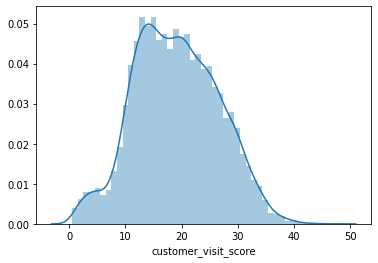

In [586]:
sns.distplot(df_train['customer_visit_score'])

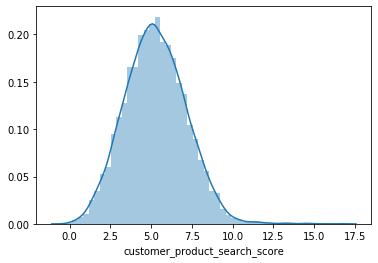

In [587]:
sns.distplot(df_train['customer_product_search_score'])

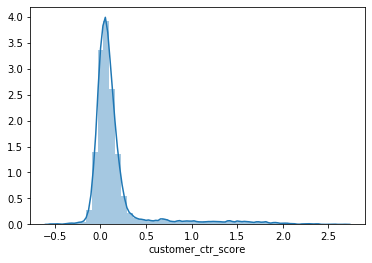

In [588]:
sns.distplot(df_train['customer_ctr_score'])

In [589]:
q = df_train['customer_ctr_score'].quantile(0.99)
df = df_train[df_train['customer_ctr_score']<q]
df_train = df.reset_index(drop=True)

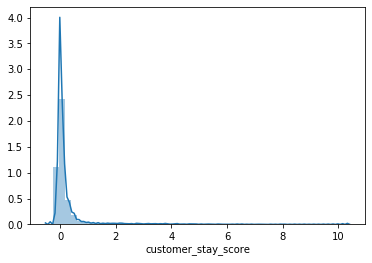

In [590]:
sns.distplot(df_train['customer_stay_score'])

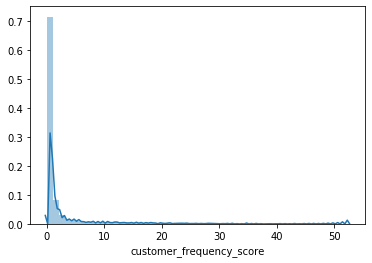

In [591]:
sns.distplot(df_train['customer_frequency_score'])

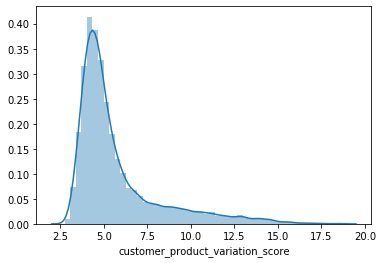

In [592]:
sns.distplot(df_train['customer_product_variation_score'])

In [593]:
q = df_train['customer_product_variation_score'].quantile(0.99)
df = df_train[df_train['customer_product_variation_score']<q]
df_train = df.reset_index(drop=True)

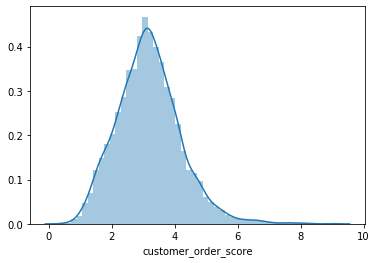

In [594]:
sns.distplot(df_train['customer_order_score'])

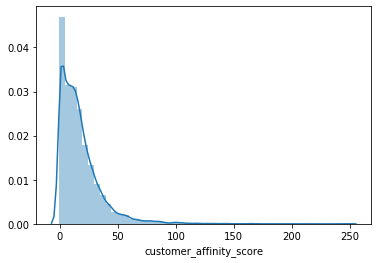

In [595]:
sns.distplot(df_train['customer_affinity_score'])

In [596]:
q = df_train['customer_affinity_score'].quantile(0.99)
df = df_train[df_train['customer_affinity_score']<q]
df_train = df.reset_index(drop=True)

In [597]:
df_train.drop(['customer_stay_score','customer_frequency_score'], axis=1, inplace=True)
df_test.drop(['customer_ctr_score','customer_frequency_score'], axis=1, inplace=True)

## Model Development

In [598]:
# algorithmic library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [599]:
Y_train = df_train['customer_category'].values
X_train= df_train.drop(['customer_category'], axis = 1)

print(X_train.shape, Y_train.shape)
X_train.head()

(10417, 16) (10417,)


,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,X1_A,X1_AA,X1_BA,X1_E,X1_F
0,13.168425,9.447662,-0.070203,4.705761,2.537985,7.959503,0,0,0,1,0,0,0,0,0,1
1,17.092979,7.329056,0.153298,4.205138,4.193444,17.517381,0,0,0,1,0,1,0,0,0,0
2,17.505334,5.143676,0.106709,4.479070,3.878971,12.595155,0,0,0,1,0,0,0,1,0,0
3,31.423381,4.917740,-0.020226,5.055535,2.708940,4.795073,0,1,0,0,0,0,0,0,0,1
4,11.909502,4.237073,0.187178,3.445247,3.677360,56.636326,0,0,0,1,0,0,1,0,0,0


In [600]:
X_test= df_test
print(X_test.shape)
X_test.head()

(7160, 16)


,customer_visit_score,customer_product_search_score,customer_stay_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,X1_A,X1_AA,X1_BA,X1_E,X1_F
0,22.500174,3.702145,0.093253,5.786842,3.748009,7.661716,0,0,1,0,0,0,0,1,0,0
1,13.225950,3.600102,0.053575,3.940359,3.469659,33.999679,0,0,1,0,0,0,1,0,0,0
2,14.603376,5.084047,-0.036299,4.254662,3.855939,33.485630,0,0,1,0,0,0,1,0,0,0
3,26.149905,3.025501,0.204591,6.942625,2.362421,0.795372,0,0,1,0,0,0,0,1,0,0
4,19.810630,5.020400,-0.028780,4.585513,3.278624,15.052058,0,0,0,1,0,0,0,1,0,0


In [601]:
X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_test).transform(X_test)

In [602]:
x_train, x_test, y_train, y_test = train_test_split( X_train, Y_train, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (8333, 16) (8333,)
Test set: (2084, 16) (2084,)


In [603]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf', gamma = 'auto')
SVM.fit(x_train, y_train)

SVM_train_predict = SVM.predict(x_train)
SVM_test_predict = SVM.predict(x_test)

print('Train Accuracy', accuracy_score(y_train, SVM_train_predict))
print("Test set Accuracy: ",accuracy_score(y_test, SVM_test_predict))

Train Accuracy 0.9733589343573743
Test set Accuracy:  0.9779270633397313


In [604]:
prediction = SVM.predict(X_test)

## Submission

In [605]:
df_submission = pd.DataFrame({'customer_id':customer_id, 'customer_category':prediction})
df_submission.to_csv('submission.csv', index=False)
df_submission.head()

,customer_id,customer_category
0,csid_10739,0
1,csid_10740,0
2,csid_10741,0
3,csid_10742,0
4,csid_10743,0


In [606]:
df_submission['customer_category'].value_counts()

0    6930
1     230
Name: customer_category, dtype: int64